In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
import re

In [2]:
def make_ini_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt',skiprows=2, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    y=(xl[t_vl==t] * 512)
    x=((1-yl[t_vl==t]) * 512)
    rl=rl[t_vl==t]

    positions = list(zip(x, y))  # Convert x, y arrays to a list of (x, y) coordinate tuples
    image_tensor = ind2CNet(positions,rl)  # Pass the positions list to the ind2CNet function

    #image_tensor = cv2.rotate(image_tensor, cv2.ROTATE_90_COUNTERCLOCKWISE)
   

 
    save_dir='/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/id/'
    
    output_path = save_dir+str(t)+'.jpg'
    #output_path_Y_c = save_dir+'source/'+str(start_ind+i)+'contr.png'

    cv2.imwrite(output_path, image_tensor)
    image_rgb = cv2.cvtColor(image_tensor, cv2.COLOR_GRAY2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    
    
def make_id_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt',skiprows=2, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    x=(xl[t_vl==t] * 512)
    y=(yl[t_vl==t] * 512)
    ide=idel[t_vl==t]

    positions = list(zip(x, y))  # Convert x, y arrays to a list of (x, y) coordinate tuples
    image_tensor = ind2id(positions,idel,ide)  # Pass the positions list to the ind2CNet function

    image_tensor = cv2.rotate(image_tensor, cv2.ROTATE_90_COUNTERCLOCKWISE)
   

 
    save_dir='/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/id/'
    
    output_path = save_dir+str(t)+'.jpg'
    #output_path_Y_c = save_dir+'source/'+str(start_ind+i)+'contr.png'

    cv2.imwrite(output_path, image_tensor)
    image_rgb = cv2.cvtColor(image_tensor, cv2.COLOR_GRAY2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    
    
    
def make_circ_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    x=(xl[t_vl==t] * 512)
    y=(yl[t_vl==t] * 512)
    rl=rl[t_vl==t]

    positions = list(zip(x, y))  # Convert x, y arrays to a list of (x, y) coordinate tuples
    image_tensor = ind2circ(positions,rl)  # Pass the positions list to the ind2CNet function

    image_tensor = cv2.rotate(image_tensor, cv2.ROTATE_90_COUNTERCLOCKWISE)
   

 
    save_dir='/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/'
    
    output_path = save_dir+'/circ/'+str(t)+'.jpg'
    #output_path_Y_c = save_dir+'source/'+str(start_ind+i)+'contr.png'

    cv2.imwrite(output_path, image_tensor)
    #image_rgb = cv2.cvtColor(image_tensor, cv2.COLOR_GRAY2RGB)
    #plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


def ind2CNet(ind_list,values):

    image_tensor =  np.zeros((512, 512),dtype=np.uint8)

    # Define the radius of the ball
    #radius = 5

    # Define the color of the ball (white)
    #color = (255, 255, 255)

    # Define the list of positions
    #positions = ind_list
    #print('ind',ind_list)



    for position, value in zip(ind_list, values):
        x, y = int(position[0]), int(position[1])
        value=value*512
        radius = int(map_value_linear(np.pi*(value**2), 10, 1500, 2, 8))
        print(value,radius)

        # Draw a circle with the given radius and color
        for i in range(-radius, radius+1):
            for j in range(-radius, radius+1):
                if i**2 + j**2 <= radius**2:
                    try:
                        image_tensor[x+i, y+j] = 255
                    except IndexError:
                        pass

    return image_tensor

def sort_key(file_name):
    # Extract the number from the file name
    number = re.findall(r'\d+', file_name)
    if number:
        return int(number[0])
    else:
        return 0

def ind2circ(ind_list,values):
    # Define the image tensor with 3 channels (RGB)
    image_tensor =  np.ones((512, 512, 3), dtype=np.uint8)*255

    # Define the radius of the circle
    #radius = 15

    # Define the color of the circle (red)
    color = (0, 0, 255)

    # Define the list of positions
    #positions = ind_list
    
    for position, value in zip(ind_list, values):
        x, y = int(position[0]), int(position[1])
        radius = int(value *(15/0.035))
        
         # Draw a circle with the given radius and color
        for i in range(-radius, radius+1):
            for j in range(-radius, radius+1):
                if (i**2 + j**2) >= (radius-1)**2 and (i**2 + j**2) <= (radius+1)**2:
                    try:
                        image_tensor[x+i, y+j] = color
                    except IndexError:
                        pass
    return image_tensor


def ind2id(ind_list,idel,ide):
    
    max_id = np.max(idel)
    
    c_list = np.linspace(100,255,int(max_id))

    image_tensor =  np.zeros((512, 512),dtype=np.uint8)

    # Define the radius of the ball
    radius = 5

    # Define the color of the ball (white)
    #color = (255, 255, 255)

    # Define the list of positions
    positions = ind_list
    #print('ind',ind_list)


    k=0
    # Loop over the positions and draw a circle around each one
    for position in positions:
        # Convert the position to integer coordinates
        #try:
        x, y = int(position[0]), int(position[1])
        
        print('**',x,y,ide[k],c_list[int(ide[k]-1)])

        # Draw a circle with the given radius and color
        for i in range(-radius, radius+1):
            for j in range(-radius, radius+1):
                if i**2 + j**2 <= radius**2:
                    try:
                        image_tensor[x+i, y+j] = c_list[int(ide[k]-1)]
                    except IndexError:
                        pass#print('IndErr',i,j)
                    
        k=k+1
        #except: 
           # pass


    return image_tensor


def combine_images(image_folder, circle_folder):
    # Sort file lists
    image_files = sorted(os.listdir(image_folder),key=sort_key)
    print('image_files',image_files)
    circle_files = sorted(os.listdir(circle_folder),key=sort_key)
    print('circ_files',circle_files)

    for img_file, circle_file in zip(image_files, circle_files):
        # Open the base image and the circle image
        image = Image.open(os.path.join(image_folder, img_file))
        circle_image = Image.open(os.path.join(circle_folder, circle_file))
        
        circle_image = circle_image.convert("RGBA")
        datas = circle_image.getdata()

        new_data = []
        for item in datas:
            # change all white (also shades of whites)
            # pixels to transparent
            if item[1] > 40 and item[2] > 40:
                new_data.append((item[0], item[1], item[2], 0))
            else:
                new_data.append(item)
                
        circle_image.putdata(new_data)

        # Scale the circle image
        circle_image = circle_image.resize((512, 512), Image.ANTIALIAS)

        # Copy the circle layer onto the base image
        image.paste(circle_image, (0,0), circle_image)

        # Save the resulting image
        image.save(os.path.join(image_folder, "combined_" + img_file))

        
        
def map_value_linear(value, in_min, in_max, out_min, out_max):
    # Ensure the input value is within the input range
    value = max(min(value, in_max), in_min)
    
    if value==in_min:
        return 1
    elif value== in_max:
        return 8

    # Map the value to the output range using linear interpolation
    return int((value - in_min) * (out_max - out_min) / (in_max - in_min) + out_min)


15.306018263841683 4
15.981233673314978 5
17.788785184738533 5
18.530248507183877 6
15.19203251177454 4
16.00060218955344 5
12.834182335720453 4


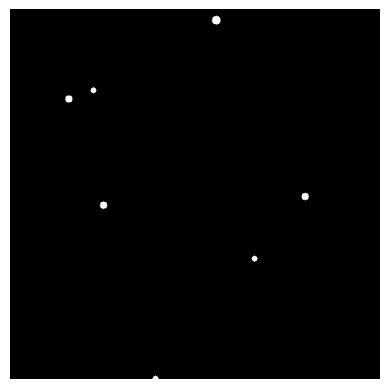

16.016602791742994 5
15.321324282105522 4
15.997214906988292 5
15.207224544286314 4
18.357848375984965 6
17.80657396992327 5
12.847016518056172 4


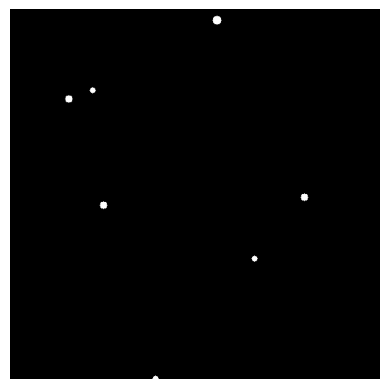

15.222431768830598 4
15.336645606387625 4
17.82438054389319 5
18.09101585052568 6
16.032619394534734 5
16.01321212189528 5
12.859863534574227 4


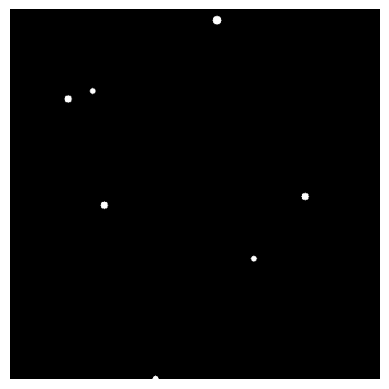

15.237654200599426 4
12.8727233981088 4
17.842204924437084 5
16.048652013929267 5
15.351982251994011 4
17.67802546503211 5
16.029225334017173 5


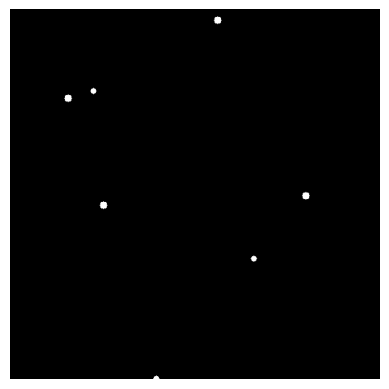

16.064700665943196 5
12.885596121506907 4
15.252891854800025 4
17.86004712936152 5
15.367334234246004 4
17.038819063126844 5
16.04525455935119 5


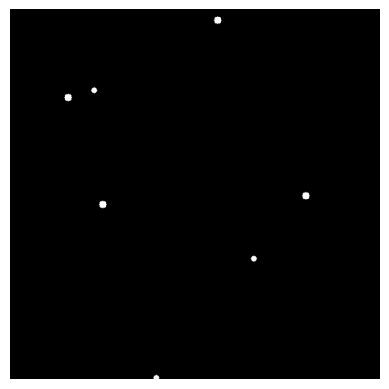

16.08076536660914 5
15.382701568480249 4
15.268144746654823 4
16.049486530001708 5
16.061299813910537 5
12.898481717628412 4
17.87790717649088 6


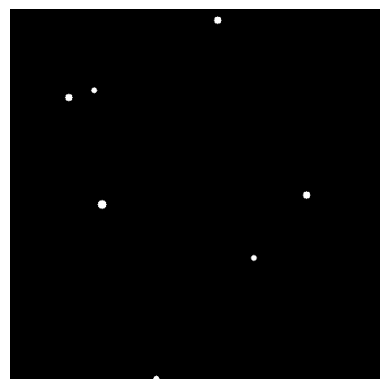

15.398084270048727 4
16.096846131975745 5
12.91138019934604 4
16.077361113724447 5
17.895785083667366 6
15.283412891401476 4
14.518245825618314 4


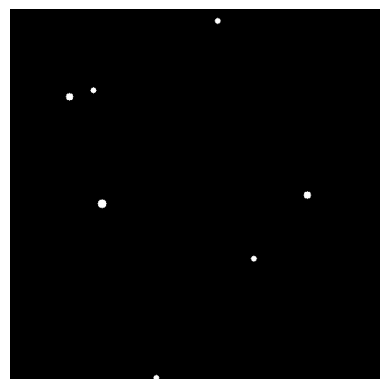

16.112942978107718 5
12.148266050108406 3
16.09343847483817 5
15.413482354318774 4
15.298696304292875 4
12.924291579545384 4
17.913680868751033 6


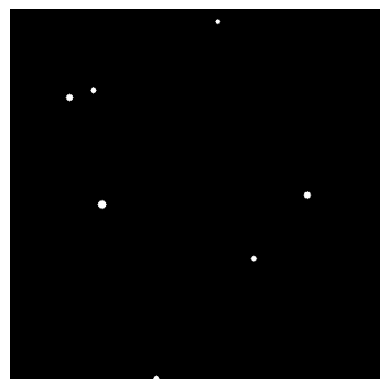

12.937215871124929 4
15.313995000597167 4
16.129055921085822 5
17.93159454961978 6
15.42889583667309 4
16.109531913313006 5
7.326205539994333 2
7.326205539994333 2


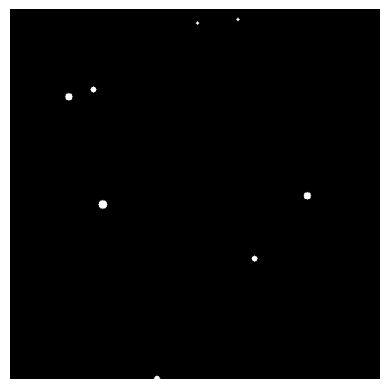

16.145184977006906 5
7.3335317455343265 2
7.3335317455343265 2
16.125641445226318 5
15.329308995597762 4
17.9495261441694 6
15.444324732509761 4
12.950153086996051 4


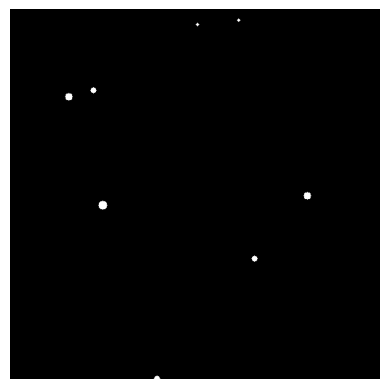

17.96747567031357 6
16.141767086671543 5
15.344638304593358 4
12.963103240083045 4
15.45976905724227 4
16.161330161983912 5
7.34086527727986 2
7.34086527727986 2


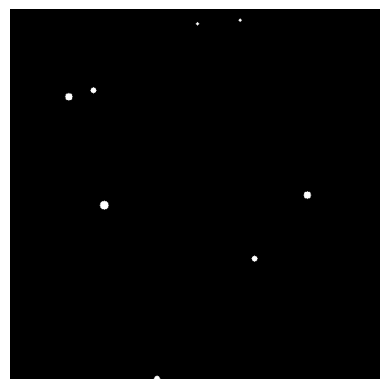

7.34820614255714 2
15.35998294289795 4
16.15790885375821 5
16.177491492145894 5
17.98544314598388 6
12.976066343323128 4
7.34820614255714 2
15.47522882629951 4


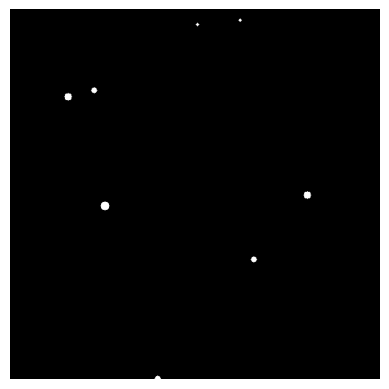

18.00342858912986 6
7.355554348699696 2
15.375342925840847 4
16.193668983638037 5
15.490704055125807 4
7.355554348699696 2
16.174066762611968 5
12.98904240966645 4


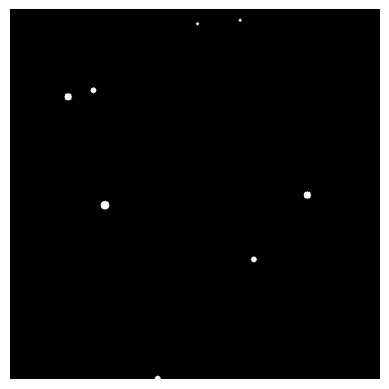

16.190240829374577 5
15.390718268766687 4
15.50619475918093 5
7.362909903048395 2
7.362909903048395 2
18.02143201771899 6
13.002031452076114 4
16.209862652621673 5


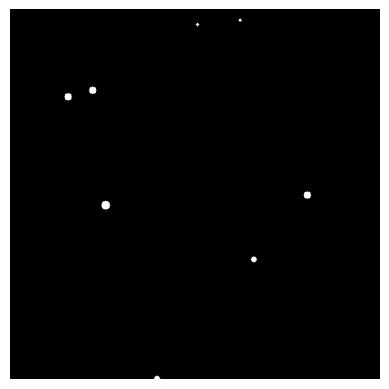

13.015033483528189 4
15.52170095394011 5
7.370272812951443 2
18.03945344973671 6
16.226072515274293 5
7.370272812951443 2
16.20643107020395 5
15.406108987035452 4


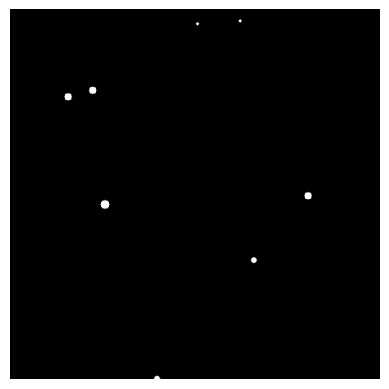

7.377643085764394 2
18.057492903186443 6
15.421515096022485 4
16.222637501274153 5
16.242298587789566 5
15.537222654894048 5
13.028048517011715 4
7.377643085764394 2


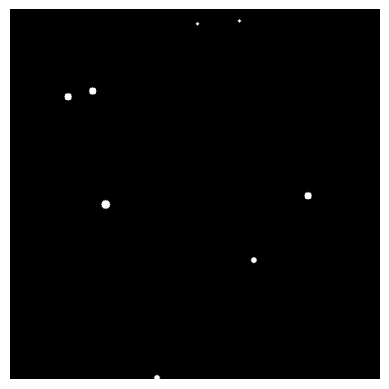

18.07555039608963 6
7.385020728850157 2
15.436936611118506 4
13.041076565528726 4
15.55275987754894 5
16.258540886377354 5
16.238860138775426 5
7.385020728850157 2


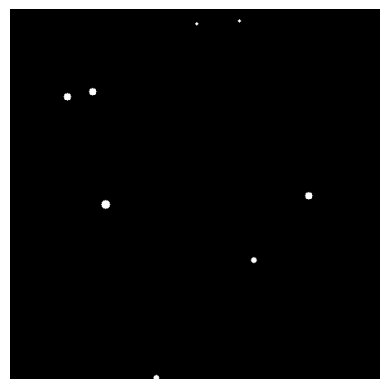

15.452373547729623 4
7.392405749579006 2
13.054117642094253 4
16.2550989989142 5
7.392405749579006 2
15.568312637426487 5
16.27479942726373 5
18.093625946485716 6


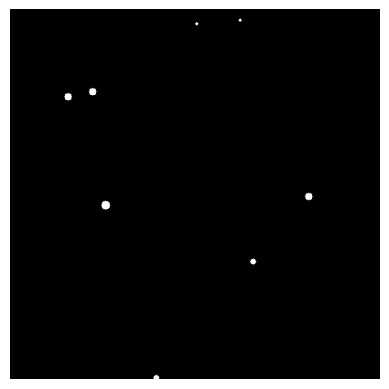

18.1117195724322 6
16.29107422669099 5
15.46782592127735 4
7.399798155328584 2
13.067171759736345 4
7.399798155328584 2
15.583880950063913 5
16.27135409791311 5


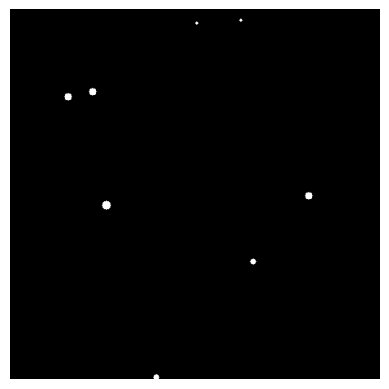

18.12983129200463 6
13.08023893149608 4
15.483293747198626 4
16.30736530091768 5
7.407197953483912 2
15.599464831013975 5
7.407197953483912 2
16.28762545201102 5


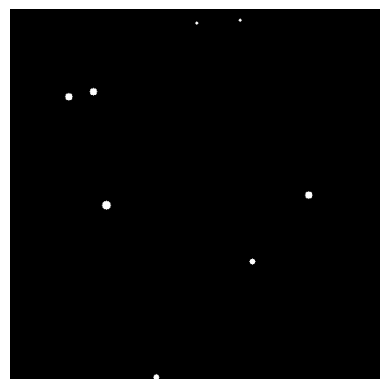

16.30391307746303 5
15.615064295844988 5
7.414605151437395 2
7.414605151437395 2
18.147961123296636 6
13.093319170427575 4
16.323672666218595 5
15.498777040945823 4


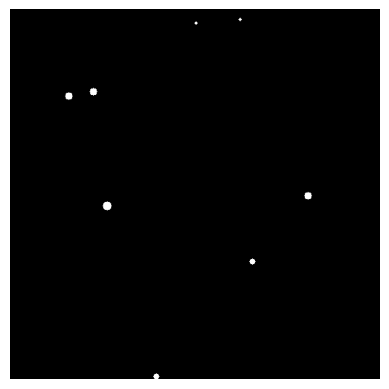

15.514275817986768 5
18.16610908441993 6
13.106412489598002 4
7.422019756588831 2
15.630679360140832 5
7.422019756588831 2
16.339996338884813 5
16.32021699054049 5


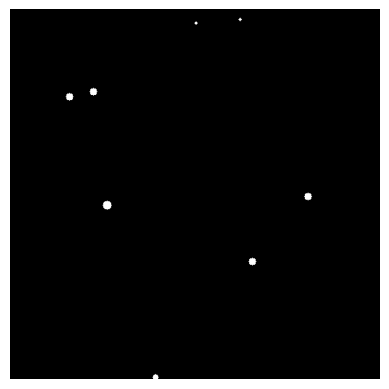

7.42944177634542 2
16.356336335223695 5
15.529790093804753 5
7.42944177634542 2
16.33653720753103 5
18.184275193504348 6
13.119518902087599 4
15.646310039500971 5


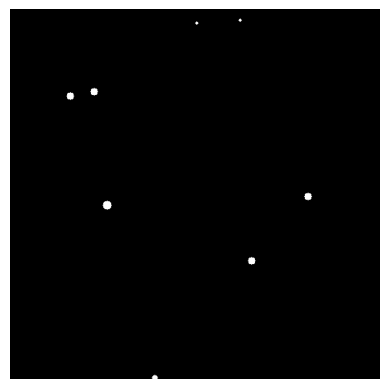

16.35287374473856 5
7.436871218121764 2
18.20245946869785 6
15.661956349540471 5
13.132638420989684 4
16.372692671558916 5
15.545319883898555 5
7.436871218121764 2


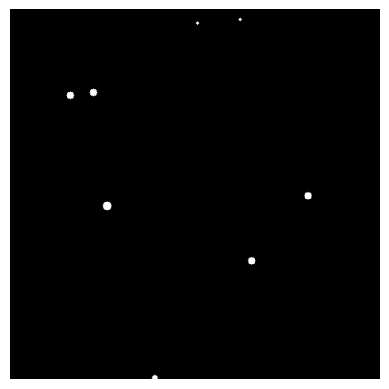

13.145771059410672 4
16.369226618483296 5
18.220661928166546 6
7.444308089339885 2
15.67761830589001 5
15.560865203782452 5
7.444308089339885 2
16.389065364230472 5


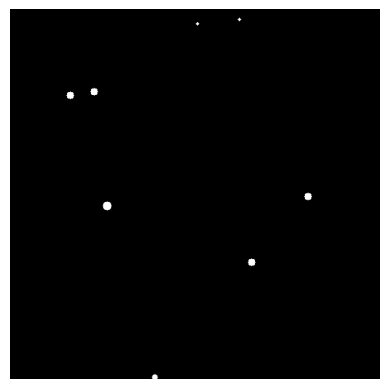

18.23888259009471 6
15.576426068986233 5
7.451752397429225 2
15.693295924195898 5
16.38559584510178 5
16.405454429594702 5
13.158916830470082 4
7.451752397429225 2


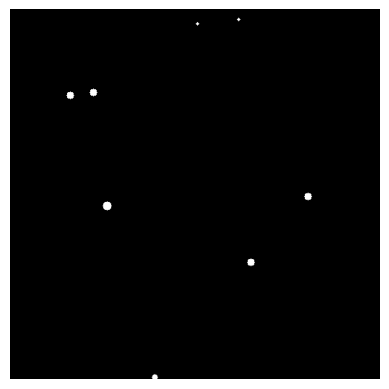

18.257121472684805 6
15.592002495055217 5
7.459204149826653 2
16.421859884024293 5
7.459204149826653 2
16.40198144094688 5
13.17207574730055 4
15.708989220120092 5


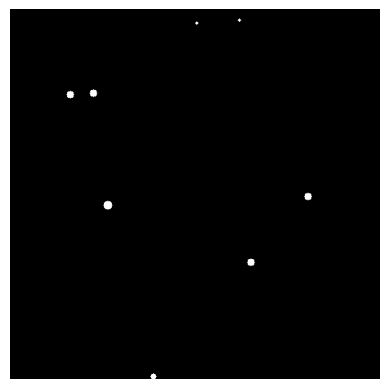

16.418383422387826 5
7.466663353976479 2
13.185247823047849 4
18.275378594157488 6
16.438281743908316 5
15.724698209340211 5
15.60759449755027 5
7.466663353976479 2


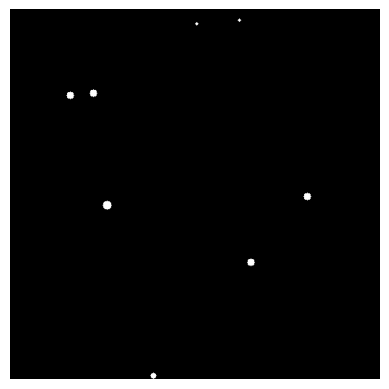

16.45472002565222 5
18.293653972751642 6
15.740422907549549 5
7.474130017330454 2
13.198433070870895 4
15.62320209204782 5
16.434801805810213 5
7.474130017330454 2


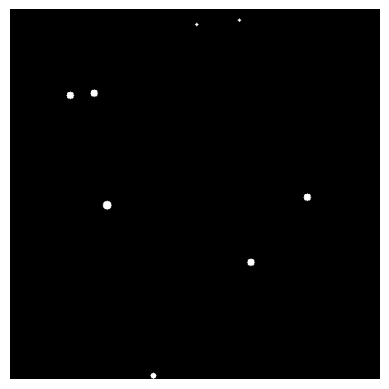

13.211631503941764 4
16.47117474567787 5
16.45123660761602 5
7.481604147347784 2
18.311947626724393 6
15.756163330457097 5
15.638825294139865 5
7.481604147347784 2


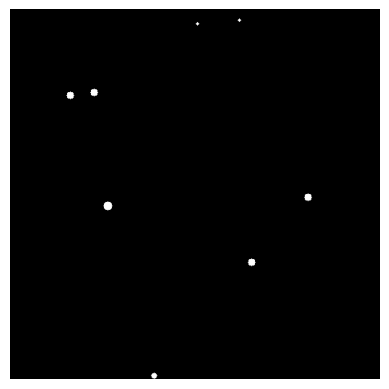

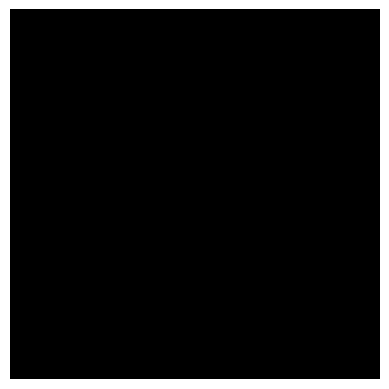

In [3]:
path_GT='3_GT'

for z in range(31):
    make_ini_pic(path_GT, t=z)

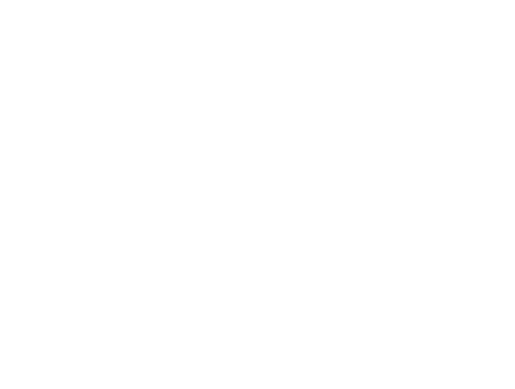

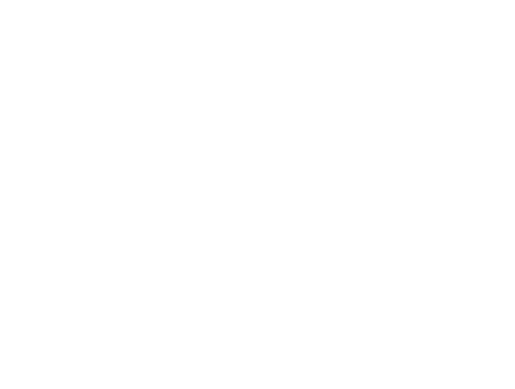

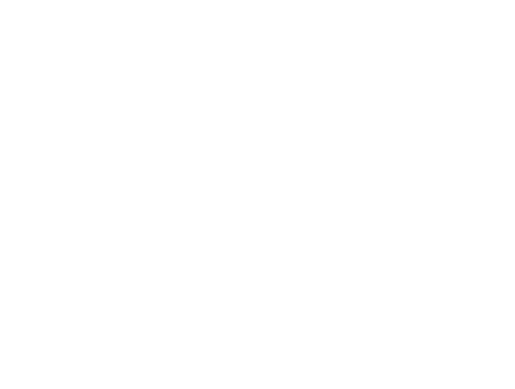

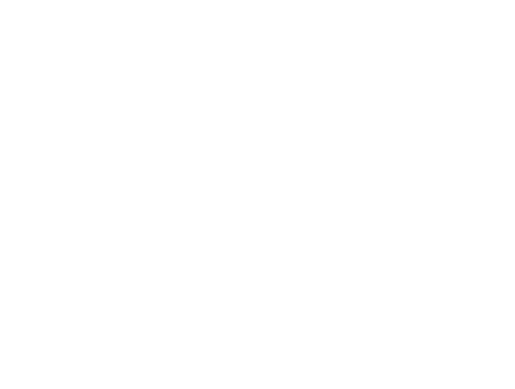

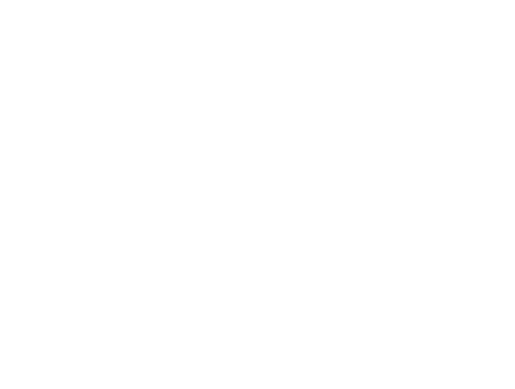

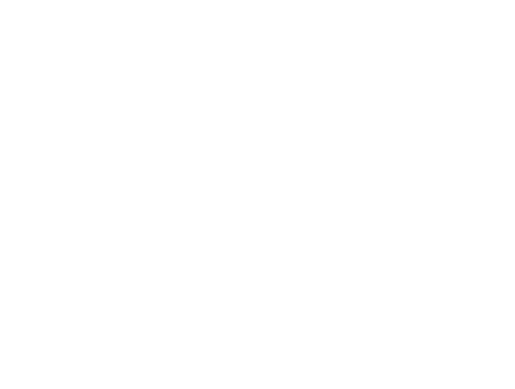

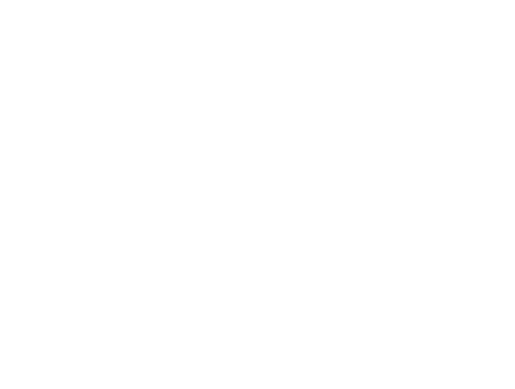

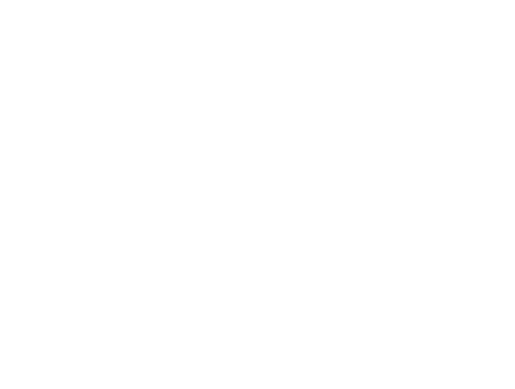

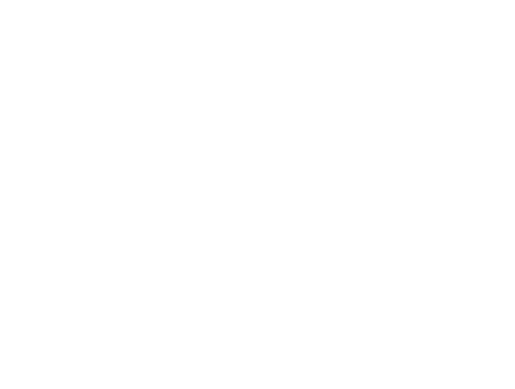

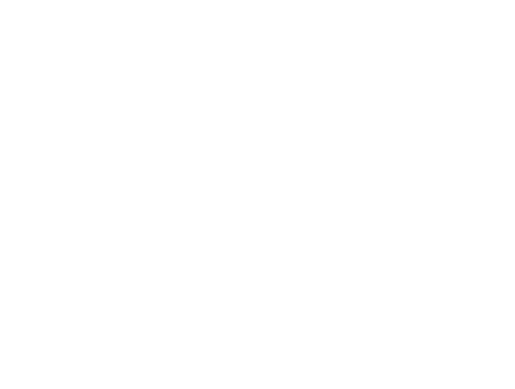

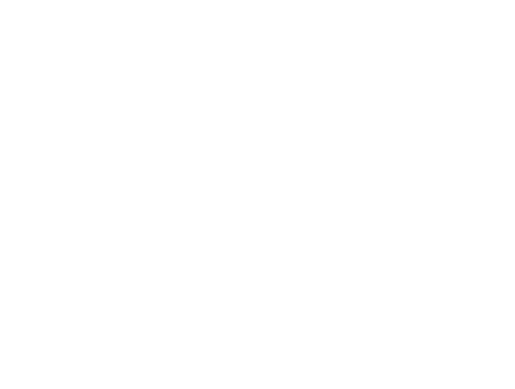

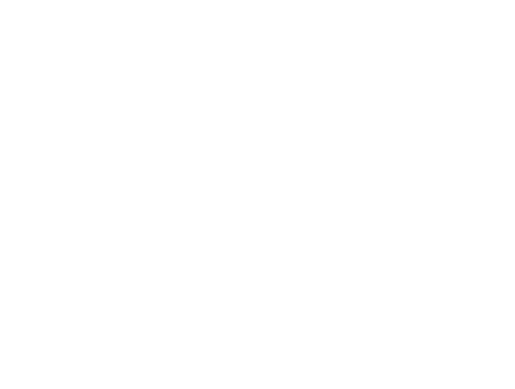

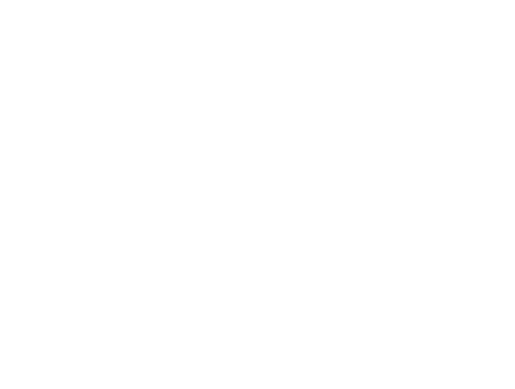

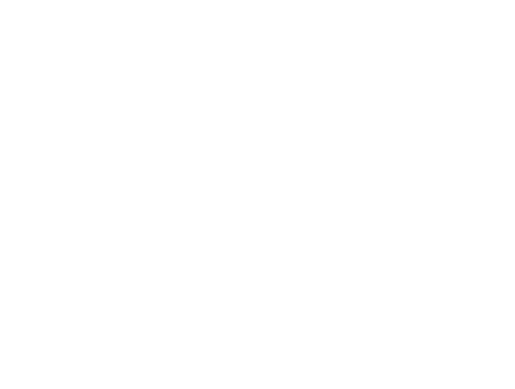

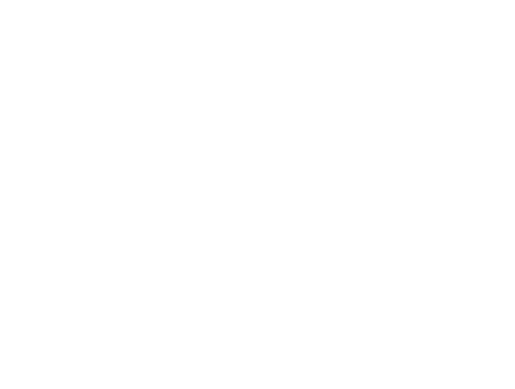

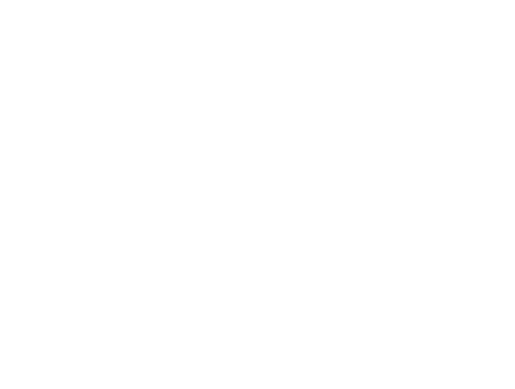

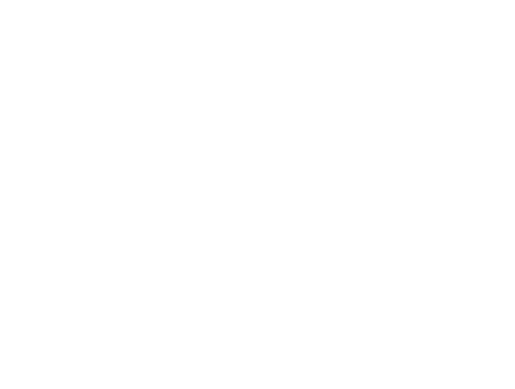

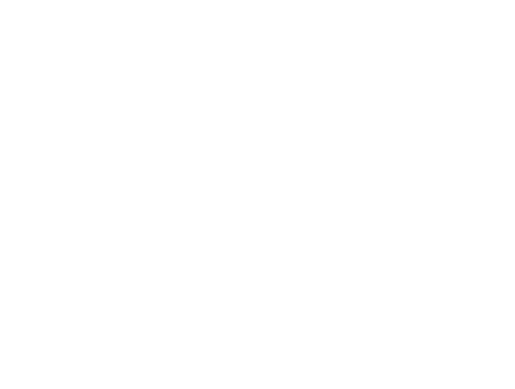

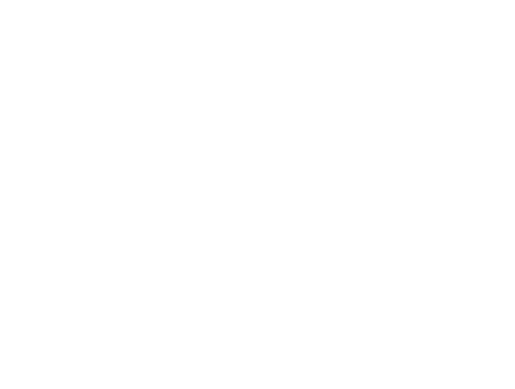

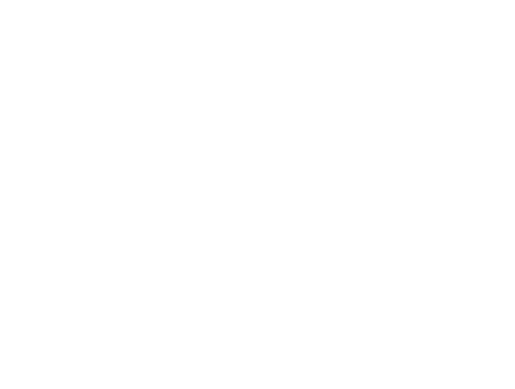

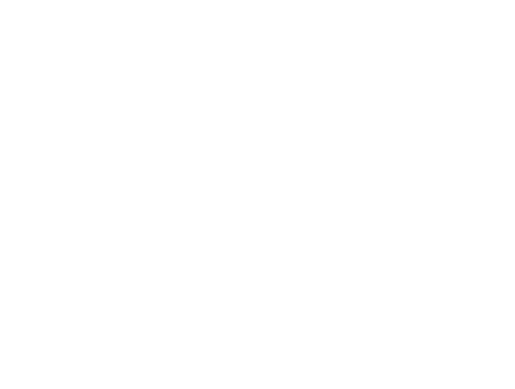

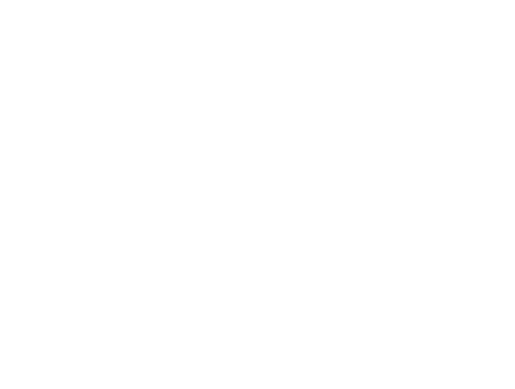

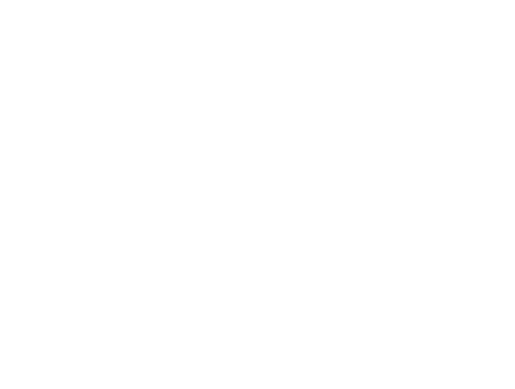

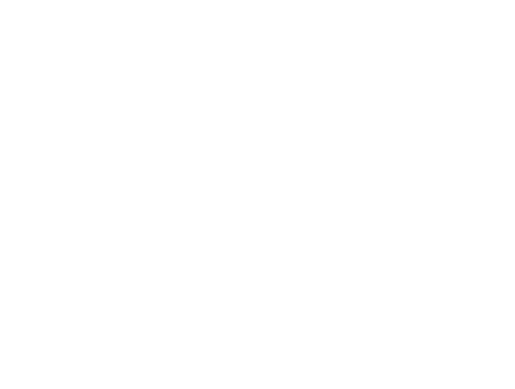

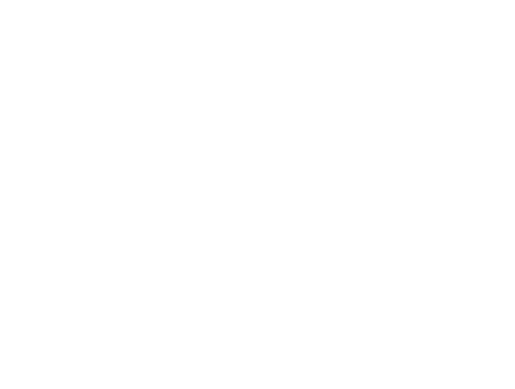

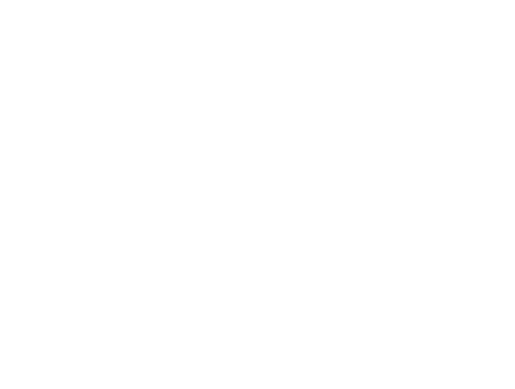

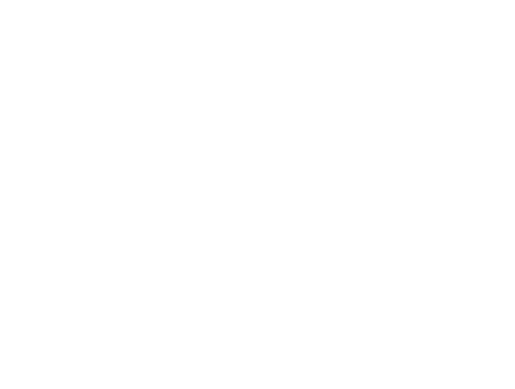

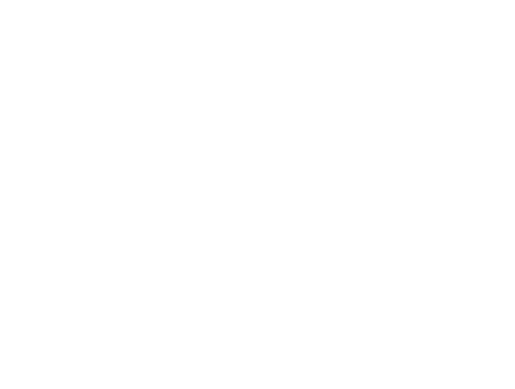

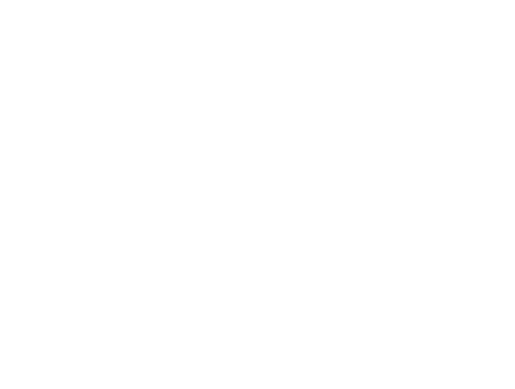

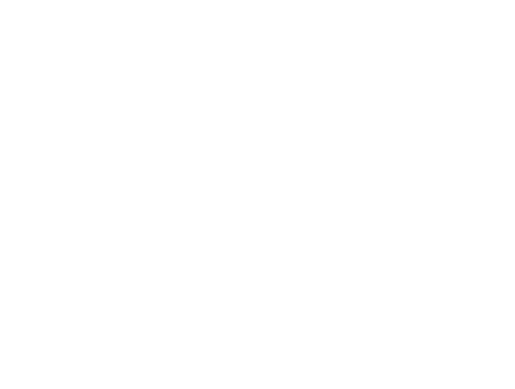

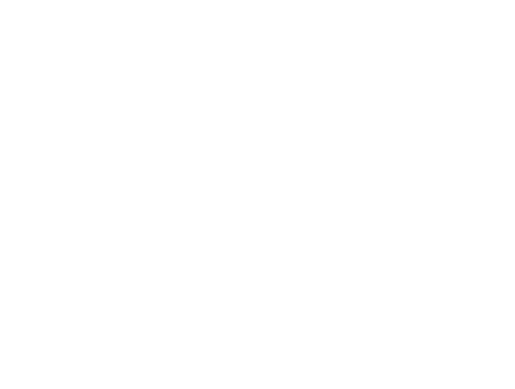

In [4]:
path_GT='3_GT'

for z in range(31):
    make_circ_pic(path_GT, t=z)

In [5]:
combine_images('/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/res_track', '/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/circ')

image_files []
circ_files ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg']


In [6]:
#path_GT='2_GT'

#for z in range(31):
#    make_id_pic(path_GT, t=z)